In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
appearances = pd.read_csv('appearances.csv')
games = pd.read_csv('games.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
game_events = pd.read_csv('game_events.csv')
player_valuations = pd.read_csv('player_valuations.csv')
game_lineups = pd.read_csv('game_lineups.csv')
players = pd.read_csv('players.csv')

In [3]:
games = games[games['competition_id'] == 'GB1']
games['date'] = pd.to_datetime(games['date'])
games = games[(games['date'] >= '2018-08-01') & (games['date'] <= '2024-12-31')]
games = games.drop(['url','competition_type','round','home_club_name','away_club_name','stadium','aggregate','competition_id','season'],axis=1)
games['attendance'] = games['attendance'].fillna(0)
games

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
1876,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking
1877,3050215,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,José Mourinho,20537.0,Mike Dean,4-4-2,4-2-3-1
1878,3050250,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,4-3-3 Attacking
1879,3050264,2018-10-27,180,762,0,0,16.0,19.0,Mark Hughes,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,4-4-2 double 6
1880,3050336,2018-12-15,543,989,2,0,7.0,11.0,Nuno Espírito Santo,Eddie Howe,30997.0,Simon Hooper,3-5-2,3-4-2-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,2018-11-10,603,1237,2,1,18.0,12.0,Neil Warnock,Chris Hughton,29402.0,Martin Atkinson,4-3-3 Attacking,4-2-3-1
66913,3421741,2020-11-01,148,1237,2,1,3.0,16.0,José Mourinho,Graham Potter,0.0,Graham Scott,4-2-3-1,3-5-2 flat
66914,3429714,2021-02-06,1132,1237,1,1,17.0,15.0,Sean Dyche,Graham Potter,0.0,Anthony Taylor,4-4-2 double 6,5-3-2
67152,3429694,2021-01-31,1237,148,1,0,17.0,5.0,Graham Potter,José Mourinho,0.0,Peter Bankes,3-4-2-1,3-4-2-1


In [4]:
game_lineups = game_lineups.drop(['game_lineups_id','player_name','number','date'],axis=1)

In [5]:
Games = pd.merge(games,game_lineups, on='game_id')
Games
# 72703행

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,19948,631,substitutes,Goalkeeper,0
1,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,46741,631,starting_lineup,Centre-Back,0
2,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,48870,1110,substitutes,Goalkeeper,0
3,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,50202,631,substitutes,Left Winger,0
4,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52059,1110,starting_lineup,Centre-Back,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72698,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,61729.0,Kevin Friend,5-4-1,5-3-2,670883,148,substitutes,Centre-Forward,0
72699,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,61729.0,Kevin Friend,5-4-1,5-3-2,677311,1132,substitutes,Central Midfield,0
72700,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,61729.0,Kevin Friend,5-4-1,5-3-2,686839,1132,substitutes,Left-Back,0
72701,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,61729.0,Kevin Friend,5-4-1,5-3-2,704801,1132,substitutes,Centre-Forward,0


In [6]:
appearances = appearances[appearances['competition_id'] == 'GB1']
appearances = appearances.drop(['competition_id','player_current_club_id'],axis=1)

In [7]:
appearances['date'] = pd.to_datetime(appearances['date'])
appearances = appearances[(appearances['date'] >= '2018-08-01') & (appearances['date'] <= '2024-12-31')]
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,0,0,0,0,45


In [8]:
players = players[players['current_club_domestic_competition_id'] == 'GB1']
players = players.drop(['first_name','last_name','image_url','url','market_value_in_eur','highest_market_value_in_eur'],axis=1)

In [9]:
player_valuations = player_valuations[player_valuations['player_club_domestic_competition_id'] == 'GB1']
player_valuations = player_valuations[(player_valuations['date'] >= '2018-08-01') & (player_valuations['date'] <= '2024-12-31')]

In [10]:
players_2 = pd.merge(players,appearances,on='player_id')
players_2

,player_id,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,...,appearance_id,game_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050171_3333,3050171,31,2018-08-12,James Milner,0,0,0,1,90
1,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050181_3333,3050181,31,2018-08-20,James Milner,0,0,1,0,67
2,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050191_3333,3050191,31,2018-08-25,James Milner,0,0,0,0,90
3,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050203_3333,3050203,31,2018-09-01,James Milner,1,0,0,1,90
4,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050214_3333,3050214,31,2018-09-15,James Milner,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47775,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095332_1005649,4095332,703,2024-02-24,Murillo,1,0,0,0,45
47776,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095347_1005649,4095347,703,2024-03-02,Murillo,0,0,0,0,90
47777,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095353_1005649,4095353,703,2024-03-10,Murillo,0,0,0,0,90
47778,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095366_1005649,4095366,703,2024-03-16,Murillo,0,0,0,0,90


In [11]:
players_2 = players_2.rename(columns={'date' : 'appearances_date'})

In [12]:
player_valuations = player_valuations.rename(columns={'date' : 'valuations_date'})

In [13]:
Players = pd.merge(players_2,player_valuations,on='player_id')

In [14]:
# Players[['current_club_id_x','current_club_id_y','current_club_domestic_competition_id','date_x','date_y','player_club_domestic_competition_id']]

In [15]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673193 entries, 0 to 673192
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             673193 non-null  int64         
 1   name                                  673193 non-null  object        
 2   last_season                           673193 non-null  int64         
 3   current_club_id_x                     673193 non-null  int64         
 4   player_code                           673193 non-null  object        
 5   country_of_birth                      659093 non-null  object        
 6   city_of_birth                         673024 non-null  object        
 7   country_of_citizenship                659261 non-null  object        
 8   date_of_birth                         673193 non-null  object        
 9   sub_position                          673193 non-null  obje

In [16]:
Players = Players.drop(['current_club_id_y','last_season','city_of_birth','contract_expiration_date','current_club_domestic_competition_id','player_name','player_club_domestic_competition_id'],axis=1)
Players
# 673193행

,player_id,name,current_club_id_x,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,...,game_id,player_club_id,appearances_date,yellow_cards,red_cards,goals,assists,minutes_played,valuations_date,market_value_in_eur
0,3333,James Milner,1237,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,...,3050171,31,2018-08-12,0,0,0,1,90,2018-12-19,15000000
1,3333,James Milner,1237,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,...,3050171,31,2018-08-12,0,0,0,1,90,2019-06-13,15000000
2,3333,James Milner,1237,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,...,3050171,31,2018-08-12,0,0,0,1,90,2019-12-10,12000000
3,3333,James Milner,1237,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,...,3050171,31,2018-08-12,0,0,0,1,90,2020-03-09,8000000
4,3333,James Milner,1237,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,...,3050171,31,2018-08-12,0,0,0,1,90,2020-04-08,6500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673188,1005649,Murillo,703,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,...,4095366,703,2024-03-16,0,0,0,0,90,2023-12-19,22000000
673189,1005649,Murillo,703,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,...,4095366,703,2024-03-16,0,0,0,0,90,2024-03-14,25000000
673190,1082850,Deivid Washington,631,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,...,4095170,631,2023-10-28,0,0,0,0,9,2023-07-25,4000000
673191,1082850,Deivid Washington,631,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,...,4095170,631,2023-10-28,0,0,0,0,9,2023-10-09,9000000


In [17]:
clubs = clubs[clubs['domestic_competition_id'] == 'GB1']
clubs = clubs.drop(['club_code','total_market_value','coach_name','filename','url','stadium_name','stadium_seats','net_transfer_record','domestic_competition_id'],axis=1)

In [18]:
Clubs = pd.merge(clubs,club_games,on='club_id')
Clubs
# 11109행

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season,game_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023,2578253,1,2.0,Mauricio Pochettino,984,1,13.0,Tony Pulis,Home,0
1,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023,2872453,1,4.0,Mauricio Pochettino,281,3,1.0,Pep Guardiola,Home,0
2,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023,2486657,0,7.0,Mauricio Pochettino,985,0,3.0,Louis van Gaal,Home,0
3,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023,2578102,0,4.0,Mauricio Pochettino,1003,1,2.0,Claudio Ranieri,Home,0
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023,2301908,2,NaN,André Villas-Boas,26,2,NaN,Murat Yakin,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11104,984,West Bromwich Albion,25,27.8,8,32.0,4,2020,3421711,0,17.0,Slaven Bilic,180,2,12.0,Ralph Hasenhüttl,Away,0
11105,984,West Bromwich Albion,25,27.8,8,32.0,4,2020,3429736,0,19.0,Sam Allardyce,1132,0,15.0,Sean Dyche,Away,0
11106,984,West Bromwich Albion,25,27.8,8,32.0,4,2020,3429866,1,19.0,Sam Allardyce,399,3,9.0,Marcelo Bielsa,Away,0
11107,984,West Bromwich Albion,25,27.8,8,32.0,4,2020,4013650,0,NaN,Carlos Corberán,698,3,NaN,Nigel Pearson,Away,0


# EDA

In [29]:
home = pd.read_csv('home_club_games.csv')
home

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,opponent_name
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,2,8.0,José Mourinho,0,2018,Watford FC,Manchester United Football Club
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,2,10.0,José Mourinho,0,2018,Chelsea Football Club,Manchester United Football Club
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,0,19.0,Rafael Benítez,0,2018,Southampton FC,Newcastle United Football Club
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1,2018,Cardiff City,Brighton and Hove Albion Football Club
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1237,1,15.0,Graham Potter,0,2020,Burnley Football Club,Brighton and Hove Albion Football Club
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club


In [30]:
away = pd.read_csv('away_club_games.csv')
away

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town
1,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1,1010,1,4.0,Javi Gracia,1,2018,Manchester United Football Club,Watford FC
2,3050250,2018-10-20,985,2,10.0,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,0,2018,Manchester United Football Club,Chelsea Football Club
3,3050264,2018-10-27,762,0,19.0,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,180,0,16.0,Mark Hughes,0,2018,Newcastle United Football Club,Southampton FC
4,3050336,2018-12-15,989,0,11.0,Eddie Howe,30997.0,Simon Hooper,3-4-2-1,543,2,7.0,Nuno Espírito Santo,0,2018,Association Football Club Bournemouth,Wolverhampton Wanderers Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,1237,1,12.0,Chris Hughton,29402.0,Martin Atkinson,4-2-3-1,603,2,18.0,Neil Warnock,0,2018,Brighton and Hove Albion Football Club,Cardiff City
2179,3421741,2020-11-01,1237,1,16.0,Graham Potter,0.0,Graham Scott,3-5-2 flat,148,2,3.0,José Mourinho,0,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club
2180,3429714,2021-02-06,1237,1,15.0,Graham Potter,0.0,Anthony Taylor,5-3-2,1132,1,17.0,Sean Dyche,0,2020,Brighton and Hove Albion Football Club,Burnley Football Club
2181,3429694,2021-01-31,148,0,5.0,José Mourinho,0.0,Peter Bankes,3-4-2-1,1237,1,17.0,Graham Potter,0,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club


In [36]:
home['home_club_name'].unique()

array(['Huddersfield Town', 'Watford FC', 'Chelsea Football Club',
       'Southampton FC', 'Wolverhampton Wanderers Football Club',
       'Manchester United Football Club', 'Crystal Palace Football Club',
       'West Ham United Football Club', 'Newcastle United Football Club',
       'Aston Villa Football Club', 'Manchester City Football Club',
       'Association Football Club Bournemouth', 'Arsenal Football Club',
       'Everton Football Club', 'Leicester City', 'Fulham Football Club',
       'Leeds United', 'Liverpool Football Club', 'West Bromwich Albion',
       'Brentford Football Club', 'Nottingham Forest Football Club',
       'Sheffield United Football Club', 'Luton Town Football Club',
       'Norwich City', 'Cardiff City', 'Tottenham Hotspur Football Club',
       'Brighton and Hove Albion Football Club', 'Burnley Football Club'],
      dtype=object)

In [37]:
home['home_club_name'].value_counts()

home_club_name
West Ham United Football Club             110
Liverpool Football Club                   109
Wolverhampton Wanderers Football Club     109
Manchester United Football Club           109
Crystal Palace Football Club              109
Newcastle United Football Club            109
Brighton and Hove Albion Football Club    109
Manchester City Football Club             109
Tottenham Hotspur Football Club           109
Arsenal Football Club                     109
Everton Football Club                     109
Chelsea Football Club                     108
Leicester City                             95
Southampton FC                             95
Burnley Football Club                      91
Aston Villa Football Club                  90
Fulham Football Club                       72
Association Football Club Bournemouth      71
Leeds United                               57
Watford FC                                 57
Brentford Football Club                    52
Sheffield United Fo

<Axes: xlabel='count', ylabel='home_club_goals'>

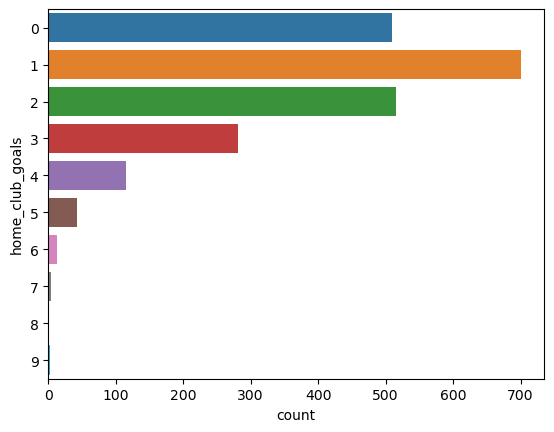

In [39]:
sns.countplot(data=home,y='home_club_goals')

<Axes: xlabel='count', ylabel='opponent_goals'>

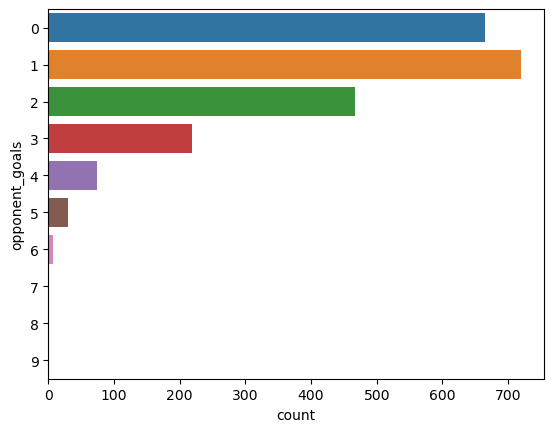

In [41]:
sns.countplot(data=home,y='opponent_goals')

In [46]:
top_teams_by_season = {}
for season in range(2018, 2024):
    season_data = home[home['season'] == season]
    top_teams = season_data.groupby('home_club_name').size().nlargest(5)
    top_teams_by_season[season] = top_teams


for season, top_teams in top_teams_by_season.items():
    print(f"Season {season}:")
    print(top_teams)
    print()

Season 2018:
home_club_name
Arsenal Football Club                     19
Association Football Club Bournemouth     19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
Cardiff City                              19
dtype: int64

Season 2019:
home_club_name
Arsenal Football Club                     19
Association Football Club Bournemouth     19
Aston Villa Football Club                 19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
dtype: int64

Season 2020:
home_club_name
Arsenal Football Club                     19
Aston Villa Football Club                 19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
Chelsea Football Club                     19
dtype: int64

Season 2021:
home_club_name
Arsenal Football Club                     19
Aston Villa Football Club                 19
Brentford Football Club                   19
Brighton and Hove Albion Football Cl

In [55]:
home_win = home[home['is_win'] == 1].copy()
home_win

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,opponent_name
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth
5,3050353,2018-12-30,985,4,6.0,Ole Gunnar Solskjær,74556.0,Lee Mason,4-3-1-2,989,1,12.0,Eddie Howe,1,2018,Manchester United Football Club,Association Football Club Bournemouth
6,3050370,2019-01-12,631,2,4.0,Maurizio Sarri,40491.0,Chris Kavanagh,4-3-3 Attacking,762,1,18.0,Rafael Benítez,1,2018,Chelsea Football Club,Newcastle United Football Club
9,3050436,2019-02-22,379,3,9.0,Manuel Pellegrini,59950.0,Lee Mason,4-1-4-1,931,1,19.0,Claudio Ranieri,1,2018,West Ham United Football Club,Fulham Football Club
10,3050454,2019-03-03,1010,2,8.0,Javi Gracia,20062.0,Jonathan Moss,4-4-2 double 6,1003,1,11.0,Brendan Rodgers,1,2018,Watford FC,Leicester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,3838000,2023-03-15,1237,1,3.0,Roberto De Zerbi,30933.0,Peter Bankes,4-2-3-1,873,0,14.0,Patrick Vieira,1,2022,Brighton and Hove Albion Football Club,Crystal Palace Football Club
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1,2018,Cardiff City,Brighton and Hove Albion Football Club
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club


In [59]:
home_win.loc[home_win['season'] == 2018,'home_club_name'].value_counts()

home_club_name
Manchester City Football Club             18
Liverpool Football Club                   17
Arsenal Football Club                     14
Chelsea Football Club                     12
Tottenham Hotspur Football Club           12
Everton Football Club                     10
Manchester United Football Club           10
Wolverhampton Wanderers Football Club     10
West Ham United Football Club              9
Newcastle United Football Club             8
Watford FC                                 8
Association Football Club Bournemouth      8
Leicester City                             8
Burnley Football Club                      7
Brighton and Hove Albion Football Club     6
Cardiff City                               6
Fulham Football Club                       6
Southampton FC                             5
Crystal Palace Football Club               5
Huddersfield Town                          2
Name: count, dtype: int64

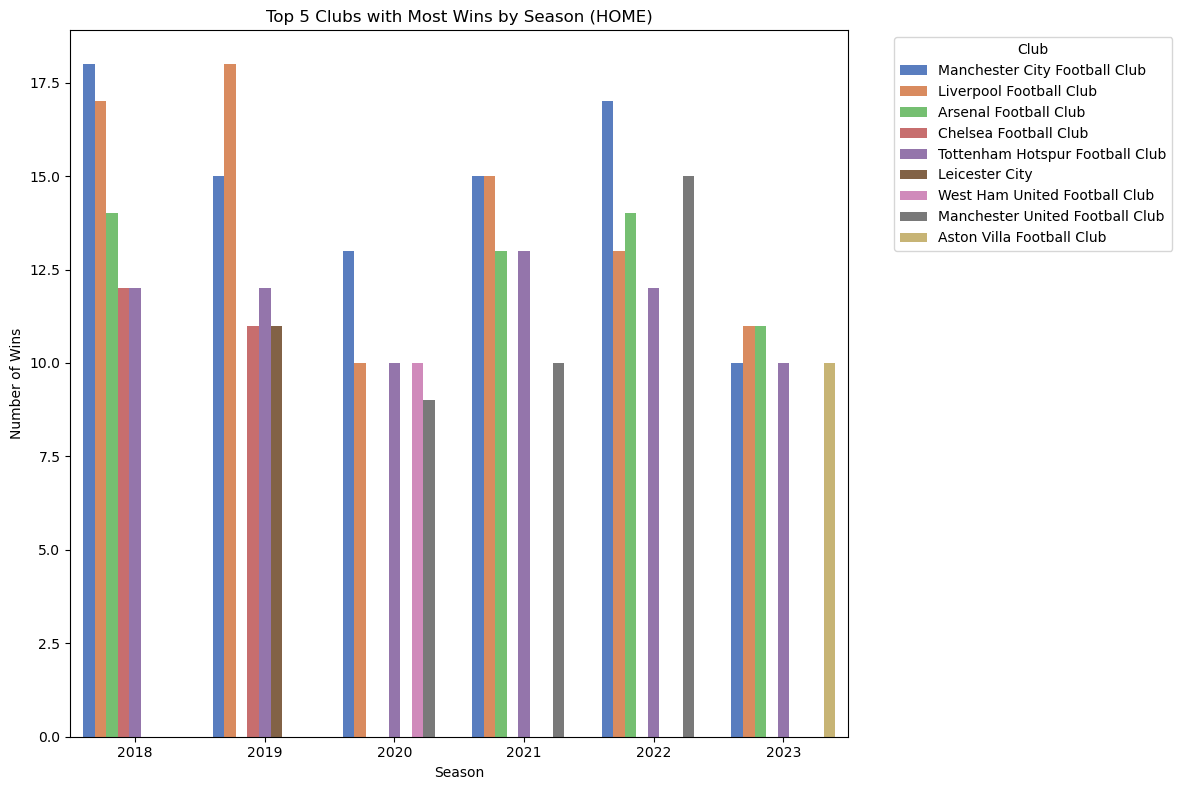

In [75]:
# 각 시즌별 데이터프레임을 담을 리스트 생성
season_dfs = []

for season in range(2018, 2024):
    top_5_clubs = home_win.loc[home_win['season'] == season,'home_club_name'].value_counts().head(5)
    season_df = pd.DataFrame({'home_club_name': top_5_clubs.index, 'count': top_5_clubs.values, 'season': season})
    season_dfs.append(season_df)

# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_3_clubs_all_seasons, x='season', y='count', hue='home_club_name', palette='muted')
plt.title('Top 5 Clubs with Most Wins by Season (HOME)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

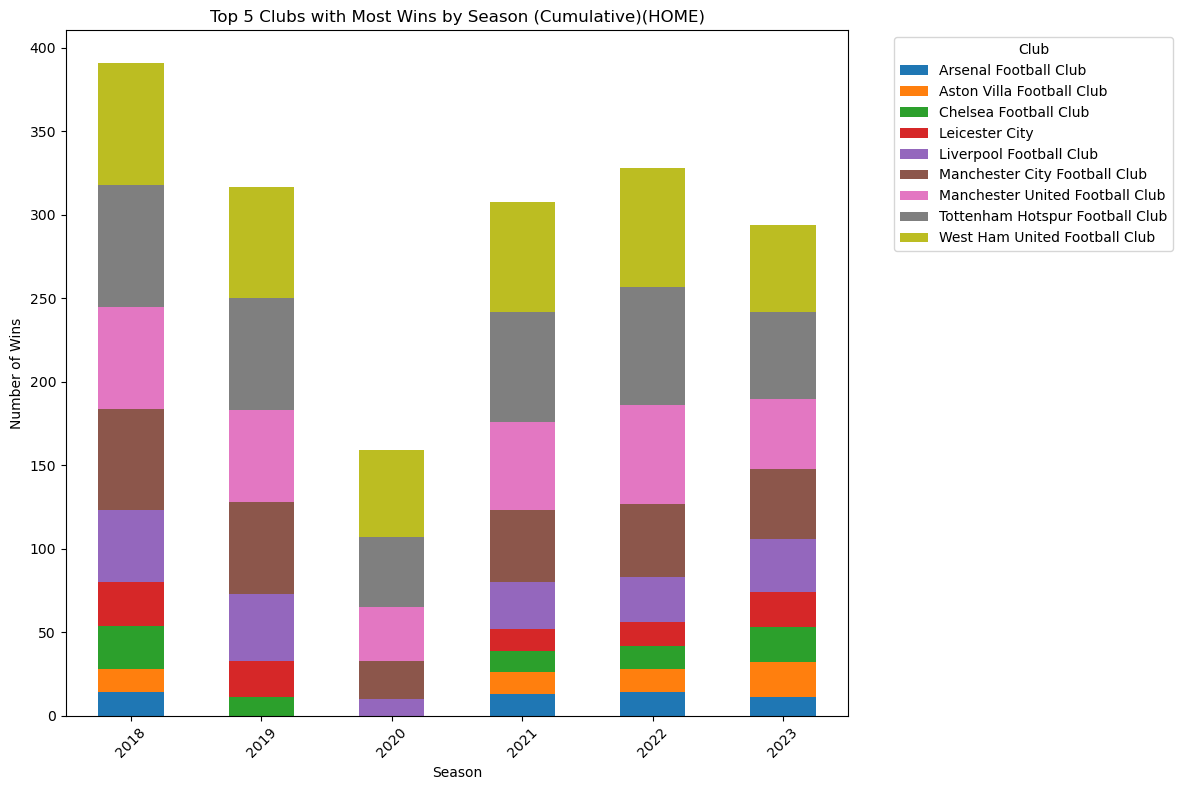

In [78]:
# 각 시즌별 데이터프레임을 담을 리스트 생성
season_dfs = []

for season in range(2018, 2024):
    top_5_clubs = home_win.loc[home_win['season'] == season,'home_club_name'].value_counts().head(5)
    season_df = pd.DataFrame({'home_club_name': top_5_clubs.index, 'count': top_5_clubs.values, 'season': season})
    season_dfs.append(season_df)

# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

plt.figure(figsize=(12, 8))

# 누적 막대 그래프를 위한 데이터프레임 변환
top_5_clubs_all_seasons_pivot = top_5_clubs_all_seasons.pivot_table(index='season', columns='home_club_name', values='count', fill_value=0)
top_5_clubs_all_seasons_cumsum = top_5_clubs_all_seasons_pivot.cumsum(axis=1)

# 누적 막대 그래프 그리기
top_5_clubs_all_seasons_cumsum.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Top 5 Clubs with Most Wins by Season (Cumulative)(HOME)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


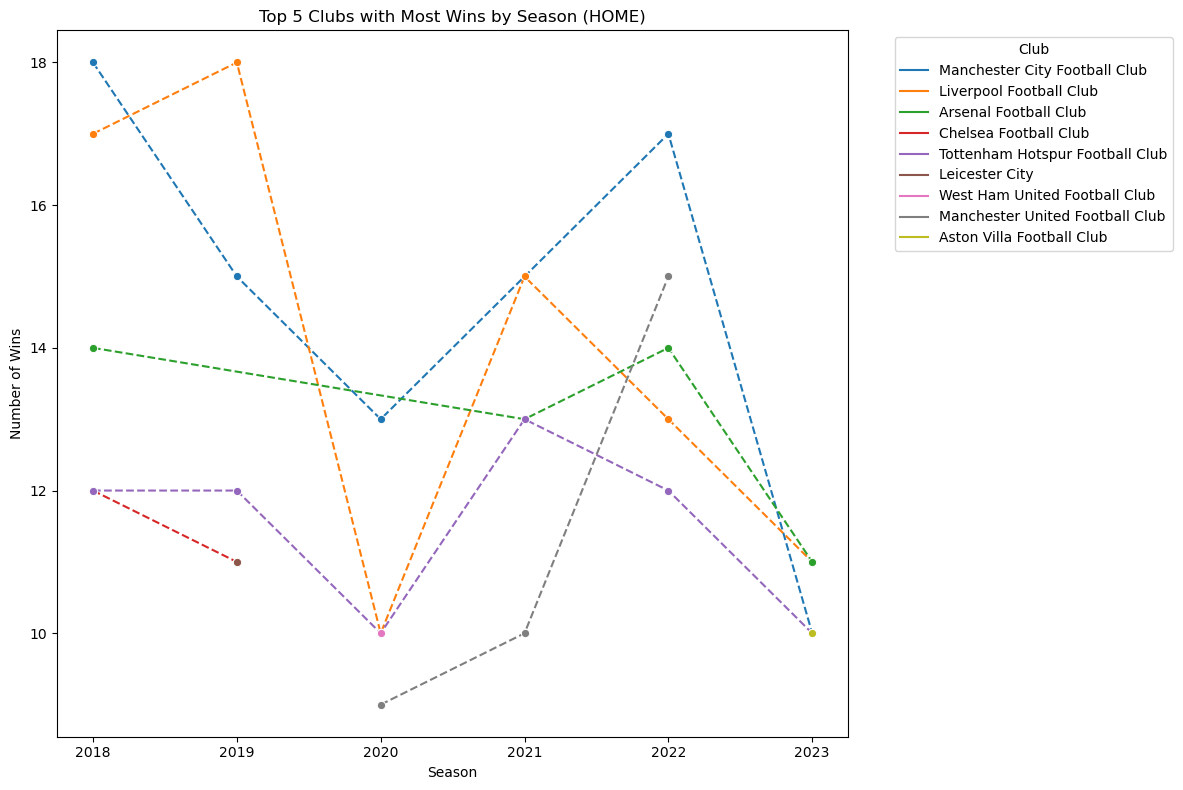

In [71]:
# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_clubs_all_seasons, x='season', y='count', hue='home_club_name', marker='o', linestyle='dashed')
plt.title('Top 5 Clubs with Most Wins by Season (HOME)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 시즌별 가장 많이 우승한 top5 클럽들

In [73]:
top_teams_by_season = {}
for season in range(2018, 2024):
    season_data = away[away['season'] == season]
    top_teams = season_data.groupby('away_club_name').size().nlargest(5)
    top_teams_by_season[season] = top_teams


for season, top_teams in top_teams_by_season.items():
    print(f"Season {season}:")
    print(top_teams)
    print()

Season 2018:
away_club_name
Arsenal Football Club                     19
Association Football Club Bournemouth     19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
Cardiff City                              19
dtype: int64

Season 2019:
away_club_name
Arsenal Football Club                     19
Association Football Club Bournemouth     19
Aston Villa Football Club                 19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
dtype: int64

Season 2020:
away_club_name
Arsenal Football Club                     19
Aston Villa Football Club                 19
Brighton and Hove Albion Football Club    19
Burnley Football Club                     19
Chelsea Football Club                     19
dtype: int64

Season 2021:
away_club_name
Arsenal Football Club                     19
Aston Villa Football Club                 19
Brentford Football Club                   19
Brighton and Hove Albion Football Cl

In [74]:
away_win = away[away['is_win'] == 1].copy()
away_win

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,away_club_name,opponent_name
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club,Huddersfield Town
1,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1,1010,1,4.0,Javi Gracia,1,2018,Manchester United Football Club,Watford FC
7,3050371,2019-01-12,1010,2,7.0,Javi Gracia,25010.0,Paul Tierney,4-4-2 double 6,873,1,14.0,Roy Hodgson,1,2018,Watford FC,Crystal Palace Football Club
16,3219321,2019-12-07,31,3,1.0,Jürgen Klopp,10832.0,Chris Kavanagh,4-2-3-1,989,0,15.0,Eddie Howe,1,2019,Liverpool Football Club,Association Football Club Bournemouth
18,3219417,2019-09-21,350,2,10.0,Chris Wilder,39354.0,Simon Hooper,3-5-2 flat,29,0,14.0,Marco Silva,1,2019,Sheffield United Football Club,Everton Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,3592178,2022-05-10,31,2,2.0,Jürgen Klopp,41919.0,Jonathan Moss,4-3-3 Attacking,405,1,15.0,Steven Gerrard,1,2021,Liverpool Football Club,Aston Villa Football Club
2167,4095319,2024-02-10,1148,2,14.0,Thomas Frank,30731.0,Simon Hooper,Starting Line-up: 3-5-2 flat,543,0,11.0,Gary O'Neil,1,2023,Brentford Football Club,Wolverhampton Wanderers Football Club
2169,4095248,2023-12-23,1132,2,18.0,Vincent Kompany,23598.0,Rebecca Welch,Starting Line-up: 4-4-2,931,0,13.0,Marco Silva,1,2023,Burnley Football Club,Fulham Football Club
2171,4095328,2024-02-18,1237,5,7.0,Roberto De Zerbi,29522.0,Stuart Attwell,Starting Line-up: 4-2-3-1,350,0,20.0,Chris Wilder,1,2023,Brighton and Hove Albion Football Club,Sheffield United Football Club


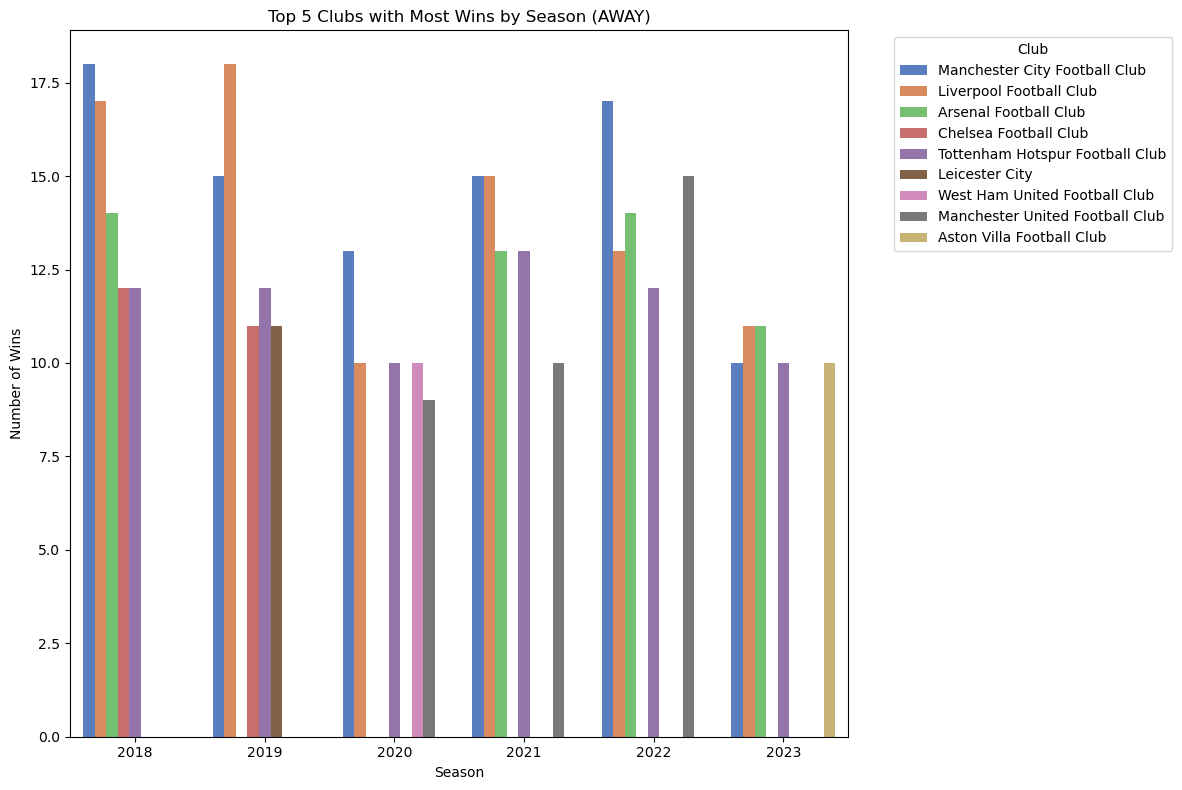

In [77]:
season_dfs = []

for season in range(2018, 2024):
    top_5_clubs = away_win.loc[away_win['season'] == season,'away_club_name'].value_counts().head(5)
    season_df = pd.DataFrame({'away_club_name': top_5_clubs.index, 'count': top_5_clubs.values, 'season': season})
    season_dfs.append(season_df)

# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_3_clubs_all_seasons, x='season', y='count', hue='home_club_name', palette='muted')
plt.title('Top 5 Clubs with Most Wins by Season (AWAY)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

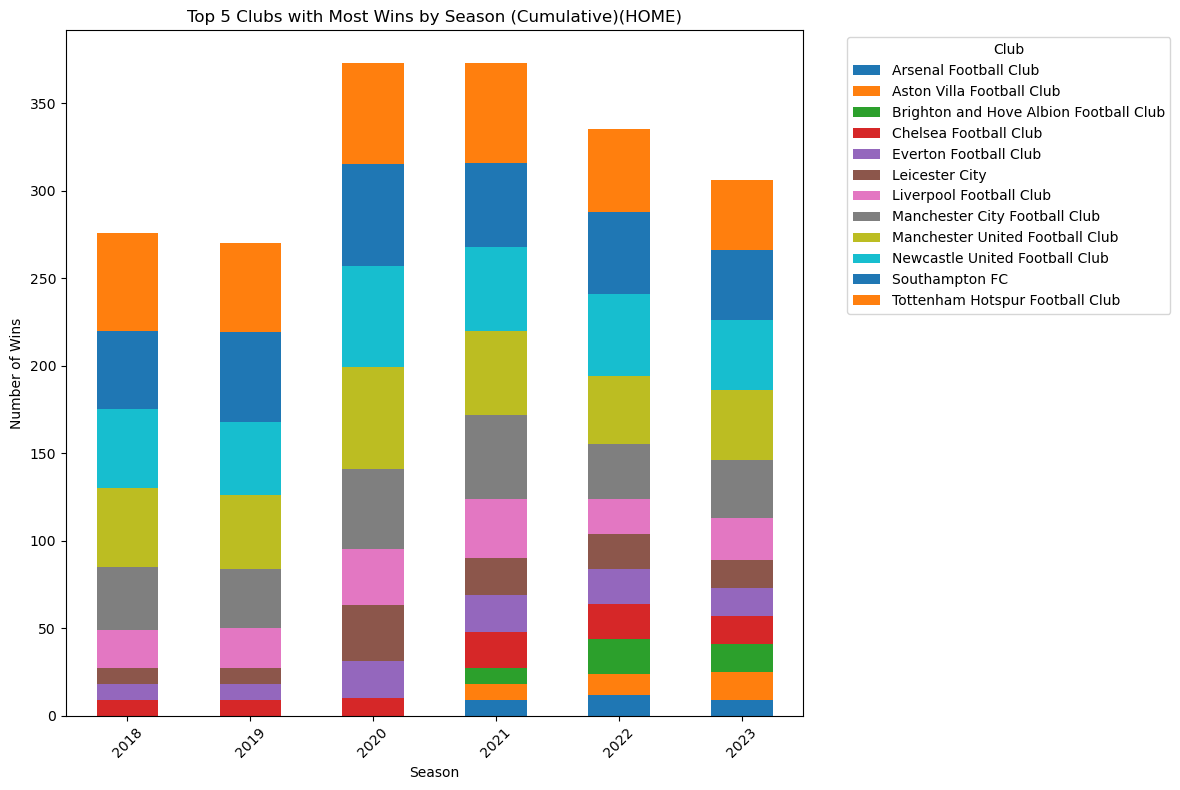

In [80]:
season_dfs = []

for season in range(2018, 2024):
    top_5_clubs = away_win.loc[away_win['season'] == season,'away_club_name'].value_counts().head(5)
    season_df = pd.DataFrame({'away_club_name': top_5_clubs.index, 'count': top_5_clubs.values, 'season': season})
    season_dfs.append(season_df)

# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

plt.figure(figsize=(12, 8))

# 누적 막대 그래프를 위한 데이터프레임 변환
top_5_clubs_all_seasons_pivot = top_5_clubs_all_seasons.pivot_table(index='season', columns='away_club_name', values='count', fill_value=0)
top_5_clubs_all_seasons_cumsum = top_5_clubs_all_seasons_pivot.cumsum(axis=1)

# 누적 막대 그래프 그리기
top_5_clubs_all_seasons_cumsum.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Top 5 Clubs with Most Wins by Season (Cumulative)(HOME)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


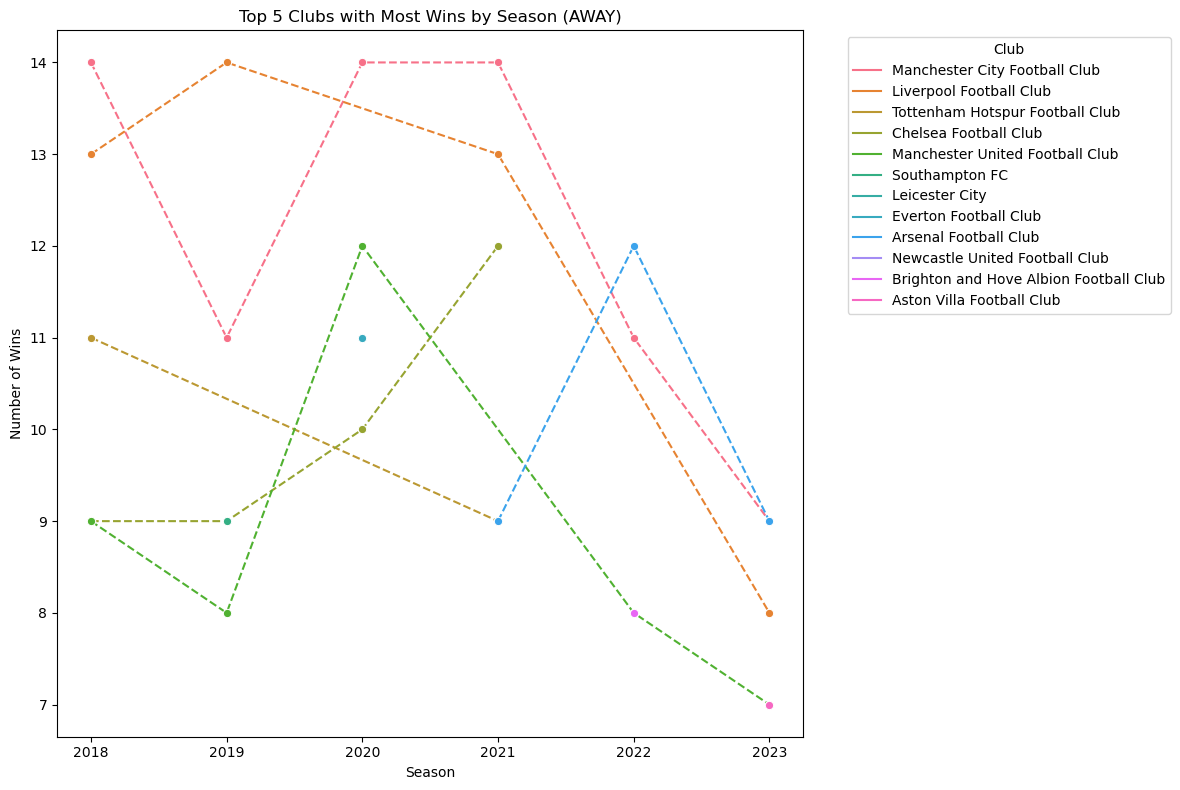

In [81]:
# 각 시즌별 데이터프레임을 하나로 합치기
top_5_clubs_all_seasons = pd.concat(season_dfs, ignore_index=True)

# 점선 그래프로 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_clubs_all_seasons, x='season', y='count', hue='away_club_name', marker='o', linestyle='dashed')
plt.title('Top 5 Clubs with Most Wins by Season (AWAY)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 시즌별 가장 많이 우승한 top5 클럽들

In [82]:
home

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,home_club_name,opponent_name
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town,Chelsea Football Club
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,2,8.0,José Mourinho,0,2018,Watford FC,Manchester United Football Club
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,2,10.0,José Mourinho,0,2018,Chelsea Football Club,Manchester United Football Club
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,0,19.0,Rafael Benítez,0,2018,Southampton FC,Newcastle United Football Club
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1,2018,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1,2018,Cardiff City,Brighton and Hove Albion Football Club
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1,2020,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1237,1,15.0,Graham Potter,0,2020,Burnley Football Club,Brighton and Hove Albion Football Club
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1,2020,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club


In [86]:
# 'season'과 'is_win'을 기준으로 데이터를 그룹화하고 'home_club_name' 컬럼의 값의 수를 세기
home_count = home.groupby(['season', 'is_win'])['home_club_name'].count()
home_count
# 홈에서 경기할 때 비기거나 지는 경우가 많다?

season  is_win
2018    0         199
        1         181
2019    0         208
        1         172
2020    0         236
        1         144
2021    0         217
        1         163
2022    0         196
        1         184
2023    0         153
        1         130
Name: home_club_name, dtype: int64

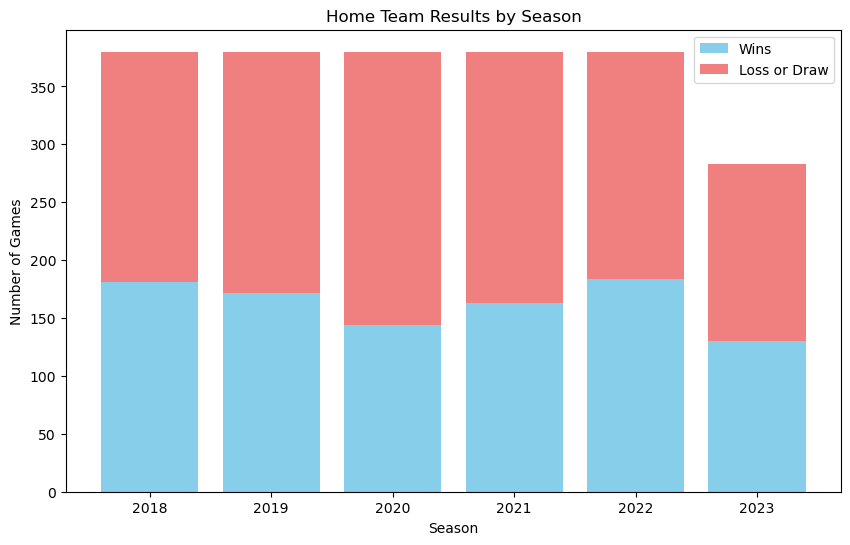

In [88]:
# 시즌별 홈 팀의 경기 결과 데이터
home_results = {
    '2018': {'Win': 181, 'Loss or Draw': 199},
    '2019': {'Win': 172, 'Loss or Draw': 208},
    '2020': {'Win': 144, 'Loss or Draw': 236},
    '2021': {'Win': 163, 'Loss or Draw': 217},
    '2022': {'Win': 184, 'Loss or Draw': 196},
    '2023': {'Win': 130, 'Loss or Draw': 153}
}

# 각 시즌별로 홈 팀의 승리와 패배 또는 비긴 경기 수 시각화
seasons = list(home_results.keys())
wins = [home_results[season]['Win'] for season in seasons]
loss_or_draw = [home_results[season]['Loss or Draw'] for season in seasons]

plt.figure(figsize=(10, 6))
plt.bar(seasons, wins, label='Wins', color='skyblue')
plt.bar(seasons, loss_or_draw, bottom=wins, label='Loss or Draw', color='lightcoral')

plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.title('Home Team Results by Season')
plt.legend()
plt.show()

In [87]:
away_count = away.groupby(['season', 'is_win'])['away_club_name'].count()
away_count

season  is_win
2018    0         252
        1         128
2019    0         264
        1         116
2020    0         227
        1         153
2021    0         251
        1         129
2022    0         271
        1         109
2023    0         189
        1          94
Name: away_club_name, dtype: int64

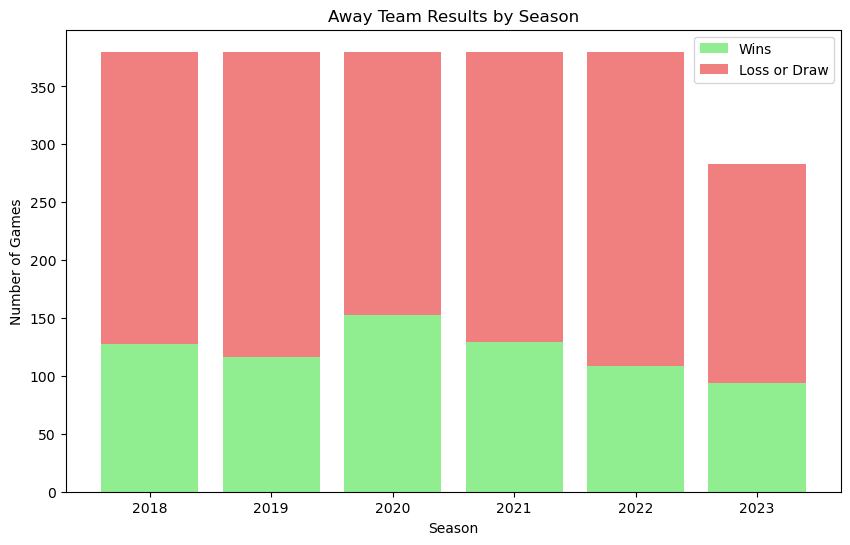

In [89]:
# 시즌별 원정 팀의 경기 결과 데이터
away_results = {
    '2018': {'Win': 128, 'Loss or Draw': 252},
    '2019': {'Win': 116, 'Loss or Draw': 264},
    '2020': {'Win': 153, 'Loss or Draw': 227},
    '2021': {'Win': 129, 'Loss or Draw': 251},
    '2022': {'Win': 109, 'Loss or Draw': 271},
    '2023': {'Win': 94, 'Loss or Draw': 189}
}

# 각 시즌별로 원정 팀의 승리와 패배 또는 비긴 경기 수 시각화
seasons = list(away_results.keys())
wins = [away_results[season]['Win'] for season in seasons]
loss_or_draw = [away_results[season]['Loss or Draw'] for season in seasons]

plt.figure(figsize=(10, 6))
plt.bar(seasons, wins, label='Wins', color='lightgreen')
plt.bar(seasons, loss_or_draw, bottom=wins, label='Loss or Draw', color='lightcoral')

plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.title('Away Team Results by Season')
plt.legend()
plt.show()

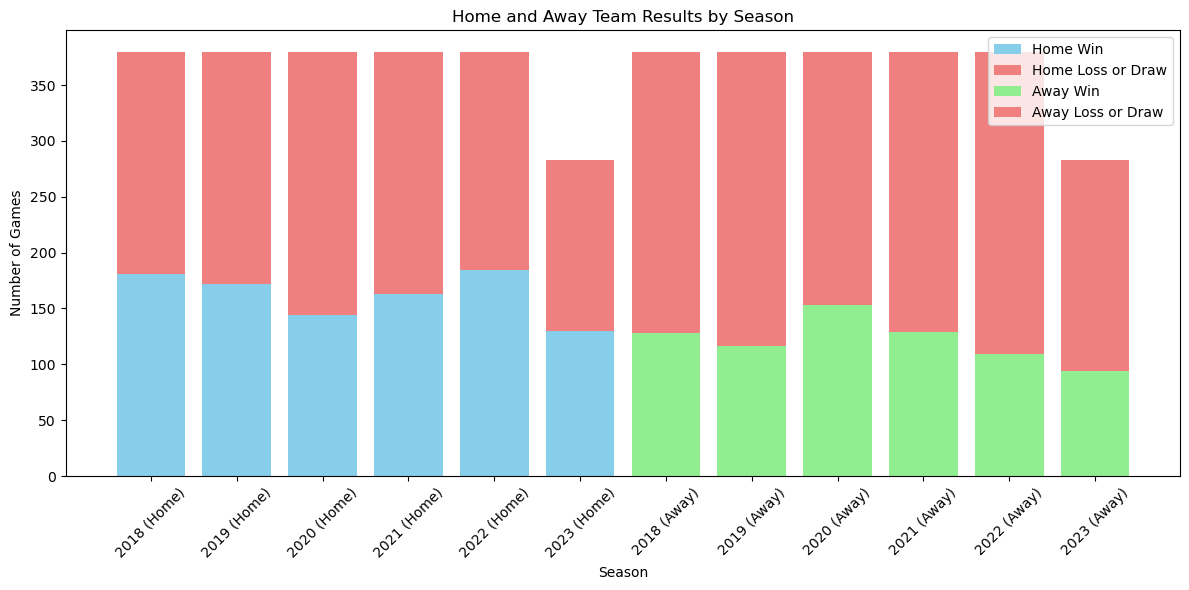

In [90]:
import matplotlib.pyplot as plt

# 시즌별 홈 팀의 경기 결과 데이터
home_results = {
    '2018': {'Win': 181, 'Loss or Draw': 199},
    '2019': {'Win': 172, 'Loss or Draw': 208},
    '2020': {'Win': 144, 'Loss or Draw': 236},
    '2021': {'Win': 163, 'Loss or Draw': 217},
    '2022': {'Win': 184, 'Loss or Draw': 196},
    '2023': {'Win': 130, 'Loss or Draw': 153}
}

# 시즌별 원정 팀의 경기 결과 데이터
away_results = {
    '2018': {'Win': 128, 'Loss or Draw': 252},
    '2019': {'Win': 116, 'Loss or Draw': 264},
    '2020': {'Win': 153, 'Loss or Draw': 227},
    '2021': {'Win': 129, 'Loss or Draw': 251},
    '2022': {'Win': 109, 'Loss or Draw': 271},
    '2023': {'Win': 94, 'Loss or Draw': 189}
}

# 각 시즌별로 홈 팀과 원정 팀의 승리와 패배 또는 비긴 경기 수 시각화
seasons = list(home_results.keys())

plt.figure(figsize=(12, 6))

# 홈 팀의 결과를 나타내는 막대 그래프
plt.bar([season + ' (Home)' for season in seasons], [home_results[season]['Win'] for season in seasons], label='Home Win', color='skyblue')
plt.bar([season + ' (Home)' for season in seasons], [home_results[season]['Loss or Draw'] for season in seasons], bottom=[home_results[season]['Win'] for season in seasons], label='Home Loss or Draw', color='lightcoral')

# 원정 팀의 결과를 나타내는 막대 그래프
plt.bar([season + ' (Away)' for season in seasons], [away_results[season]['Win'] for season in seasons], label='Away Win', color='lightgreen')
plt.bar([season + ' (Away)' for season in seasons], [away_results[season]['Loss or Draw'] for season in seasons], bottom=[away_results[season]['Win'] for season in seasons], label='Away Loss or Draw', color='lightcoral')

plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.title('Home and Away Team Results by Season')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [92]:
home.groupby(['season','is_win'])['home_club_name'].agg(['count'])

count
season is_win       
2018   0         199
       1         181
2019   0         208
       1         172
2020   0         236
       1         144
2021   0         217
       1         163
2022   0         196
       1         184
2023   0         153
       1         130

In [94]:
away.groupby(['season','is_win'])['away_club_name'].agg(['count'])

count
season is_win       
2018   0         252
       1         128
2019   0         264
       1         116
2020   0         227
       1         153
2021   0         251
       1         129
2022   0         271
       1         109
2023   0         189
       1          94

In [96]:
home.pivot_table(index='is_win',values='home_club_name',aggfunc='count')

,home_club_name
is_win,
0,1209
1,974


In [101]:
win_count = home[home['is_win'] == 1].shape[0]

loss_count = home[home['is_win'] == 0].shape[0]


total_count = home.shape[0]

# 전체적인 이긴 비율 계산
win_ratio = win_count / total_count

# 전체적인 진 비율 계산
loss_ratio = loss_count / total_count

print("HOME 팀이 이긴 비율:", "{:.2f}".format(win_ratio),"%")
print("HOME 팀이 진 비율:","{:.2f}".format(loss_ratio),'%')

HOME 팀이 이긴 비율: 0.45 %
HOME 팀이 진 비율: 0.55 %


In [97]:
away.pivot_table(index='is_win',values='away_club_name',aggfunc='count')

,away_club_name
is_win,
0,1454
1,729


In [102]:
win_count = away[away['is_win'] == 1].shape[0]

loss_count = away[away['is_win'] == 0].shape[0]


total_count = away.shape[0]

# 전체적인 이긴 비율 계산
win_ratio = win_count / total_count

# 전체적인 진 비율 계산
loss_ratio = loss_count / total_count

print("AWAY 팀이 이긴 비율:", "{:.2f}".format(win_ratio),"%")
print("AWAY 팀이 진 비율:","{:.2f}".format(loss_ratio),'%')

AWAY 팀이 이긴 비율: 0.33 %
AWAY 팀이 진 비율: 0.67 %


array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'home_club_id'}>,
        <Axes: title={'center': 'home_club_goals'}>],
       [<Axes: title={'center': 'home_club_position'}>,
        <Axes: title={'center': 'attendance'}>,
        <Axes: title={'center': 'opponent_id'}>],
       [<Axes: title={'center': 'opponent_goals'}>,
        <Axes: title={'center': 'opponent_position'}>,
        <Axes: title={'center': 'is_win'}>],
       [<Axes: title={'center': 'season'}>, <Axes: >, <Axes: >]],
      dtype=object)

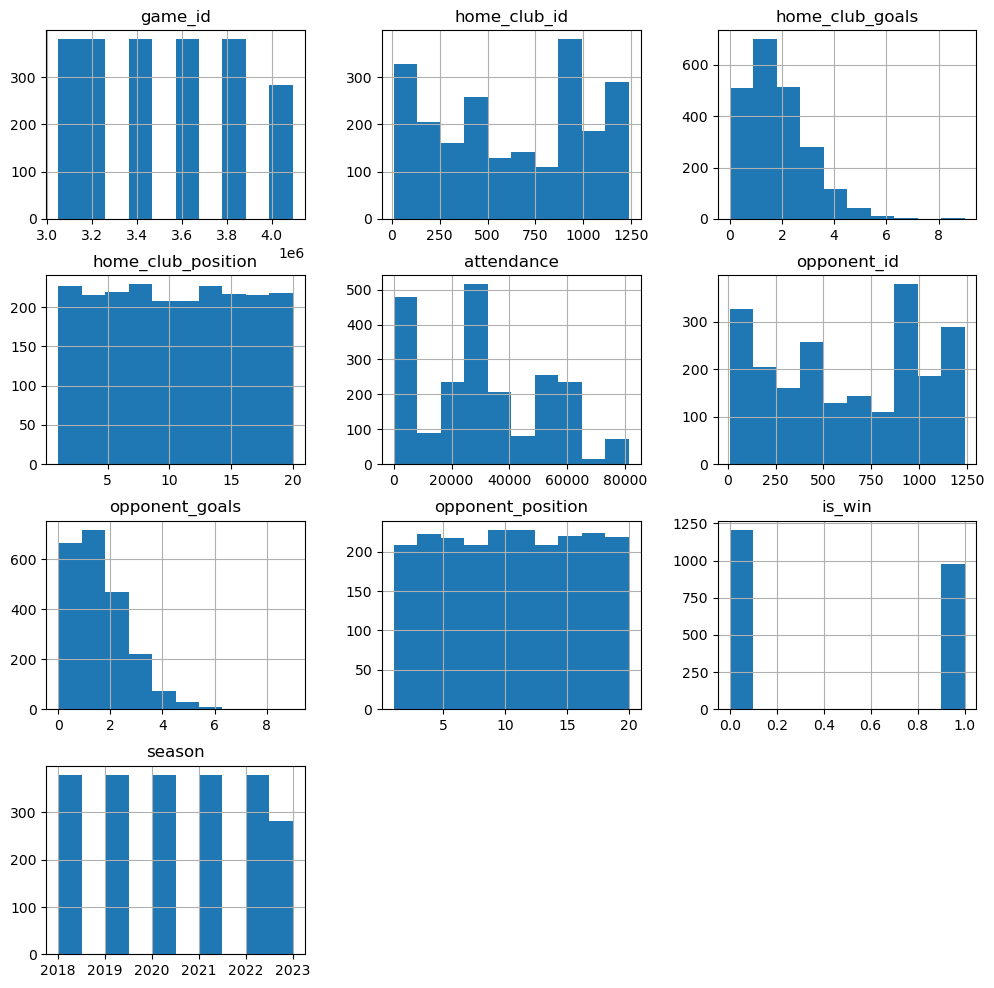

In [103]:
home.hist(figsize=(12,12))

array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'away_club_id'}>,
        <Axes: title={'center': 'away_club_goals'}>],
       [<Axes: title={'center': 'away_club_position'}>,
        <Axes: title={'center': 'attendance'}>,
        <Axes: title={'center': 'opponent_id'}>],
       [<Axes: title={'center': 'opponent_goals'}>,
        <Axes: title={'center': 'opponent_position'}>,
        <Axes: title={'center': 'is_win'}>],
       [<Axes: title={'center': 'season'}>, <Axes: >, <Axes: >]],
      dtype=object)

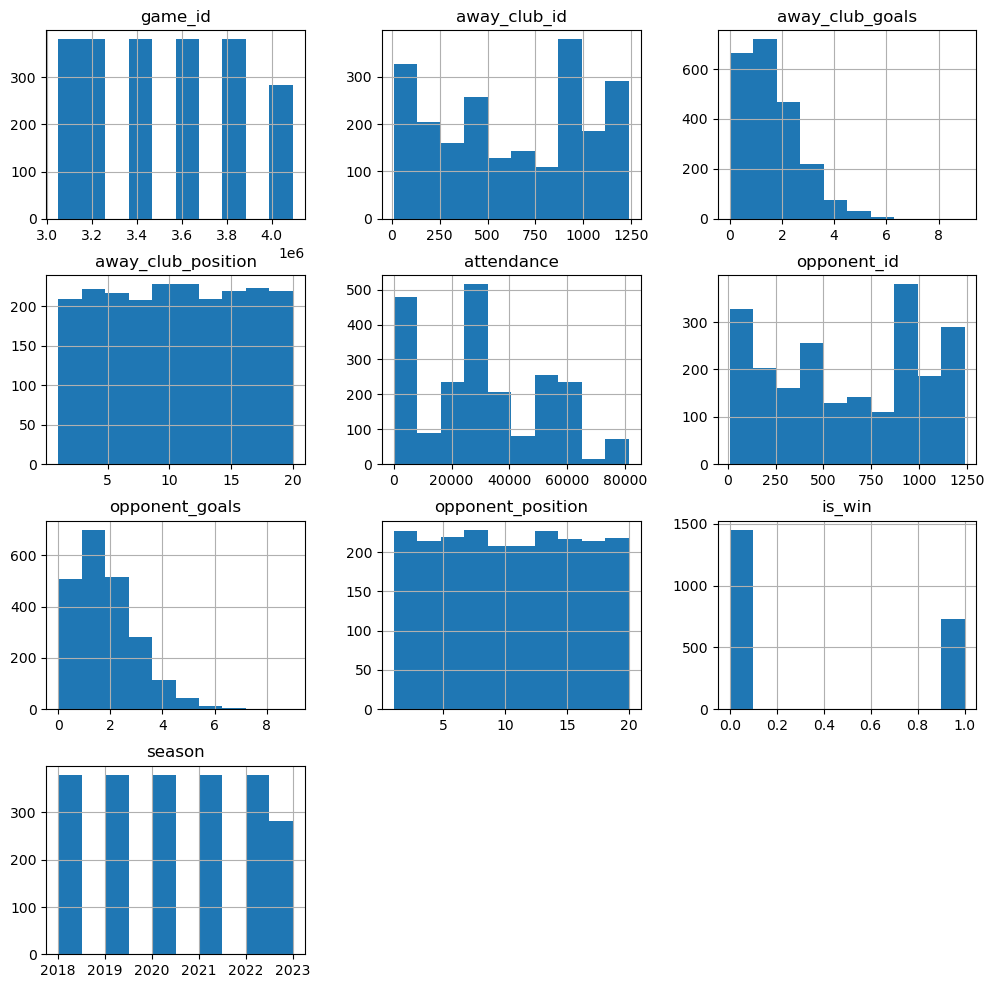

In [104]:
away.hist(figsize=(12,12))

<Axes: xlabel='home_club_goals', ylabel='count'>

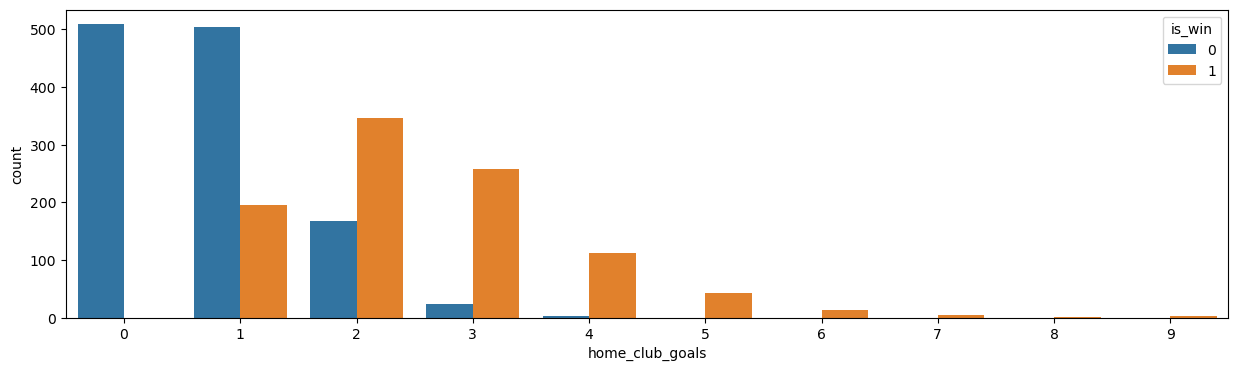

In [116]:
plt.figure(figsize=(15,4))
sns.countplot(data=home,x='home_club_goals',hue='is_win')